In [3]:
L = 500e-6               #Inductor a utilizar [Hy]
IL_dc = 0.85                #Corriente media en el inductor a utilizar [A]
IL_max = 2.25             #Corriente maxima en el inductor a utilizar [A]
Fsw = 200e3               #Frecuencia de conmutacion a utilizar [Hz]
Pcu_max = 1              #Perdidas maximas en el alambre a utilizar [watt]

## **Se tienen los siguientes datos**

# Metodo Erickson

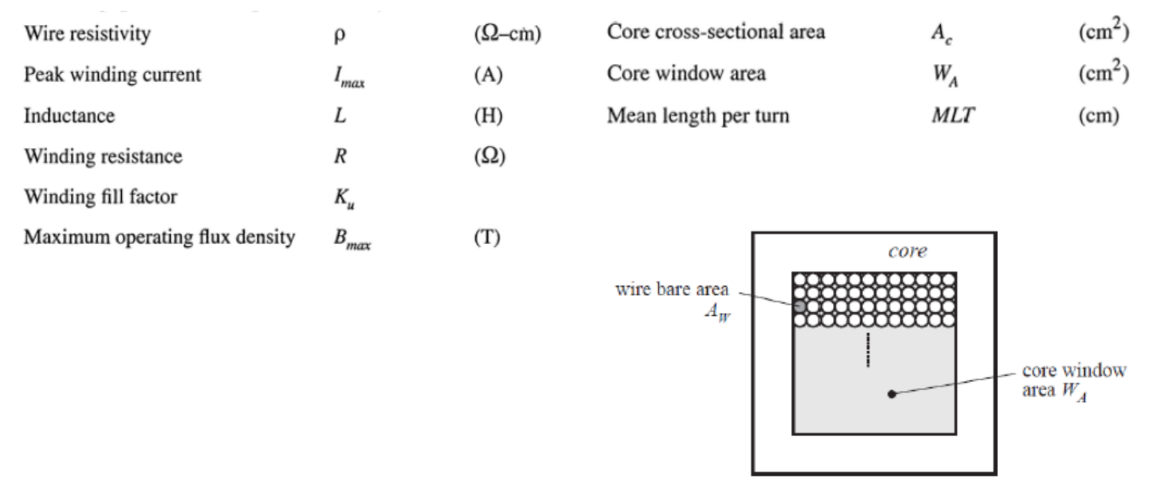

**1) Cálculo de la resistencia máxima del alambre: Rcu_max [ohm]**

In [7]:
Rcu_max = Pcu_max/(IL_dc**2)
Rcu_max                               #Resistencia maxima del alambre a utilizar [ohm]

1.384083044982699

**2) Determinamos el material del nucleo a utilizar, segun la frecuencia de conmutación**

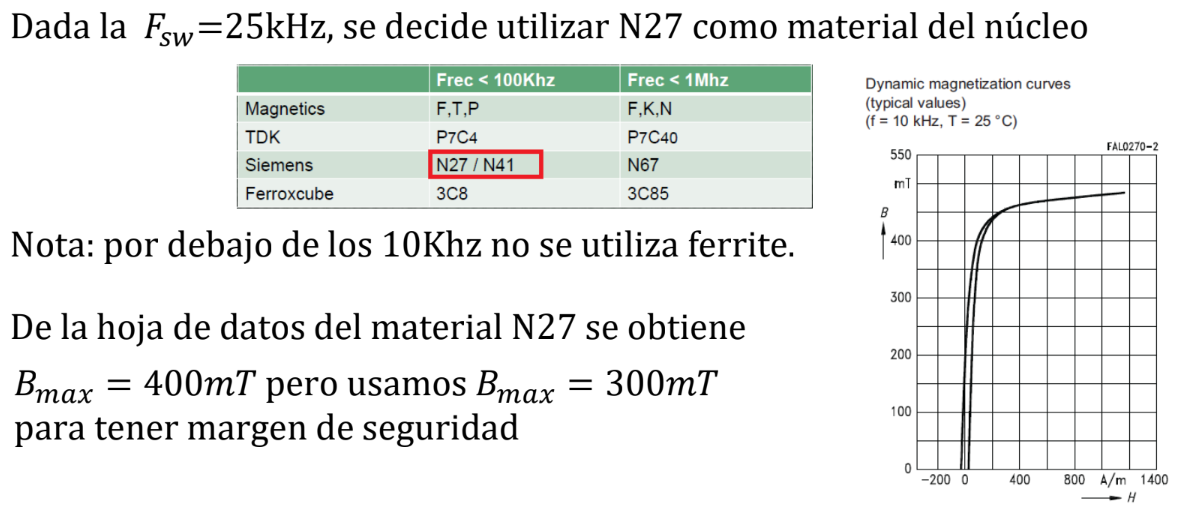

**3) Cálculo de la constante geométrica del núcleo: Kg [cm3]**

El factor de utilizacion 0 < Ku < 1 varia segun la geometria de la ventana.Para una ventana cuadrada, se utiliza Ku=0.33

In [9]:
 Ku = 0.33                              #Factor de ventana a utilizar
 Ro_cu = 1.724e-6                       #Resistividad del cobre [ohm*cm]
 B_max = 0.37                            #Densidad maxima del flujo magnetico [Tesla], extraida de la hoja de datos del material N27
 Kg = (Ro_cu*(L**2)*(IL_max**2)*1e8)/((B_max**2)*Rcu_max*Ku)
 Kg                                     #Constante geometrica del nucleo [cm5] (calculada)

0.0034894965220134133

Se elige el núcleo mas pequeño que cumple con lo pedido, resultando el EE30
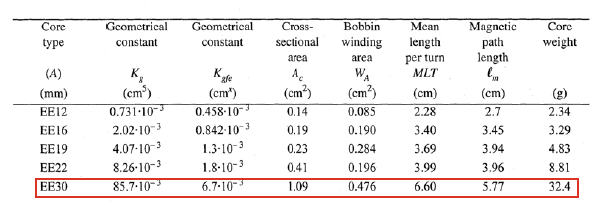

**4) Cálculo del entrehierro necesario: lg [m]

In [23]:
uo = 4*3.1416*1e-7           #Permeabilidad del aire [Hy/m]
Ac = 1.09                  #Area de la sección transversal del núcleo [cm2], para el nucleo EE40 (extraido de la tabla de caracteristicas de nucleos)
lg = (uo*L*(IL_max**2)*1e4)/((B_max**2)*Ac)
lg                           #Entrehierro necesario [m] (calculado)

0.00021316503709263446

**5) Cálculo del número de vueltas: nl**

In [24]:
#Primer opcion de calculo
from math import sqrt
Ac = 1.09e-4                  #Area de la sección transversal del núcleo [m2], para el nucleo EE30 (extraido de la tabla de caracteristicas de nucleos)
nl = sqrt((L*lg)/(Ac*uo))
nl                            #Numero de vueltas (calculado)

27.894867344408627

In [28]:
#Segunda opcion de calculo
Ac = 1.09                      #Area de la sección transversal del núcleo [cm2], para el nucleo EE30 (extraido de la tabla de caracteristicas de nucleos)
nl = (L*IL_max*1e4)/(Ac*B_max)
nl                             #Numero de vueltas (calculado)

27.89486734440863

**5) Cálculo de la sección del alambre: Aw [cm2] ** **me quede aca**

In [25]:
nl = 28                        #Numero de vueltas a utilizar
Wa =  0.476                    #Area central de la ventana [cm2], para el nucleo EE30 (extraido de la tabla de caracteristicas de nucleos)
Aw = (Ku*Wa)/nl
Aw                             #Seccion del alambre [cm2] (calculado)

0.0056099999999999995

Dado que el Aw utlizado debe ser menor o igual al Aw calculado, se elije  AWG#20
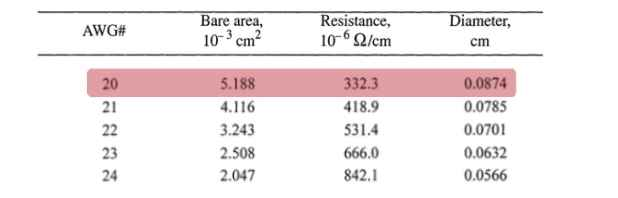

**6) Se verifica la resistencia del alambre: Rcu [ohm]**

In [29]:
MLT = 6.6                 #Longitud media por vuelta [cm], para el nucleo EE30 (extraido de la tabla de caracteristicas de nucleos)
Aw = 5.188e-3             #Seccion del alambre [cm2], para el material AWG#20 (extraido de la tabla de caracteristicas de alambres)
Rcu = (Ro_cu*nl*MLT)/Aw
Rcu                        #Resistencia del alambre elegido [ohm]

0.06117944460131441

Se cumple que Rcu < Rcu_max y de esta manera no superar las pérdidas máximas en el alambre especificadas



**7) Cálculo de la densidad de corriente en el alambre: Sigma_IL [A/mm2]**

In [32]:
Aw =5.188e-1             #Seccion del alambre [mm2], para el material AWG#30 (extraido de la tabla de caracteristicas de alambres)
Sigma_IL = IL_max/Aw
Sigma_IL                   #Densidad de corriente en el alambre [A/mm2]

4.336931380107941

El bobinado es menor a 5 [A/mm2], no calienta



